# Filtragem de Ativos

1) Serão utilizados somente os ativos que compões o IBOVESPA de modo a garantir liquidez. Fonte:  https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm

2) Serão filtrados ativos descorrelacionados

3) Serão utilizados dados fundamentalista para filtragem: Maiores lucros, ROE ou margens financeirassua liquidez

In [ ]:
!pip install fundamentus

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NATU3 -> NTCO3 e MOTV3 não existe mais
ibov = ["ALOS3", "ABEV3", "ASAI3", "AURE3", "AZZA3", "B3SA3", "BBSE3", "BBDC3",
    "BBDC4", "BRAP4", "BBAS3", "BRKM5", "BRAV3", "BRFS3", "BPAC11", "CXSE3",
    "CMIG4", "COGN3", "CPLE6", "CSAN3", "CPFE3", "CMIN3", "CVCB3", "CYRE3",
    "DIRR3", "ELET3", "ELET6", "EMBR3", "ENGI11", "ENEV3", "EGIE3", "EQTL3",
    "FLRY3", "GGBR4", "GOAU4", "HAPV3", "HYPE3", "IGTI11", "IRBR3", "ISAE4",
    "ITSA4", "ITUB4", "KLBN11", "RENT3", "LREN3", "MGLU3", "POMO4", "MRFG3",
    "BEEF3",  "MRVE3", "MULT3", "NTCO3", "PCAR3", "PETR3", "PETR4",
    "RECV3", "PRIO3", "PETZ3", "PSSA3", "RADL3", "RAIZ4", "RDOR3", "RAIL3",
    "SBSP3", "SANB11", "STBP3", "SMTO3", "CSNA3", "SLCE3", "SMFT3", "SUZB3",
    "TAEE11", "VIVT3", "TIMS3", "TOTS3", "UGPA3", "USIM5", "VALE3", "VAMO3",
    "VBBR3", "VIVA3", "WEGE3", "YDUQ3"]

tickers = [ativo + '.SA' for ativo in ibov]

dt_ini, dt_fim =  '2020-01-01','2024-08-01'
df_precos = pd.DataFrame()
df_precos = yf.download(tickers, dt_ini, dt_fim)['Close']

/tmp/ipython-input-1715460299.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_precos = yf.download(tickers, dt_ini, dt_fim)['Close']
[*********************100%***********************]  83 of 83 completed


Validação

In [ ]:
serie = df_precos.isnull().sum()
serie = serie[serie>0]
ativos_nulos = list(serie.index)
ativos_nulos

['ALOS3.SA',
 'ASAI3.SA',
 'AURE3.SA',
 'BRAV3.SA',
 'CMIN3.SA',
 'CXSE3.SA',
 'IGTI11.SA',
 'ISAE4.SA',
 'PETZ3.SA',
 'RAIZ4.SA',
 'RDOR3.SA',
 'RECV3.SA',
 'SMFT3.SA',
 'VAMO3.SA']

Foram buscados precos a partir de 2023 de modo que todos os ativos tivessem precos pois alguns ativos , como ALOS3 não tinham precos antes desta data

In [ ]:
dt_ini, dt_fim =  '2023-01-01','2024-08-01'
df_precos = pd.DataFrame()
df_precos = yf.download(tickers, dt_ini, dt_fim)['Close']

/tmp/ipython-input-565968370.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_precos = yf.download(tickers, dt_ini, dt_fim)['Close']
[*********************100%***********************]  83 of 83 completed


# Análise fundamentalista

*   roe: Retorno sobre patrimônio: mostra eficiência da empresa em gerar lucro com o capital próprio.

*   roic: Retorno sobre capital investido: mede eficiência em usar todo o capital (dívida + patrimônio)

*   mrgebit Margem EBIT: lucro operacional sobre receita, indica eficiência operacional.

*   mrgliq: Margem líquida: lucro final sobre receita, mostra lucratividade real.

*   c5y: Considerar crescimento histórico ) como critério de consistência do crescimento de lucros ou receita nos últimos 5 anos. ✅ Importante para prever tendência de valorização futura.

*   mrgEBIT: Margem EBIT  mostra quanto do faturamento se converte em lucro operacional. ✅ Empresas com margens operacionais estáveis tendem a ter resultados mais previsíveis.

*   PCG (Price-to-Cash-Flow / Caixa Operacional): preço pago pelo caixa operacional gerado.✅ Indica previsibilidade de geração de caixa; interessante para risco operacional.

In [ ]:
import fundamentus
fundamentos_total = fundamentus.get_resultado()
# filtra apenas os que estaõ no indice bovesap
fundamentos_total = fundamentos_total.loc[fundamentos_total.index.intersection([t for t in ibov])]
# apenas os indicadores desejados
fundamentos = fundamentos_total[['roe', 'roic', 'mrgebit', 'mrgliq', 'c5y', 'mrgebit', 'pcg']]

Correlação de indicadores

Não há correlações maiores que .8 , logo serão usados todos os indicadores

Multiples       roe      roic   mrgebit    mrgliq       c5y   mrgebit  \
Multiples                                                               
roe        1.000000  0.090743  0.058170  0.228897 -0.018371  0.058170   
roic       0.090743  1.000000  0.610395  0.065670 -0.067804  0.610395   
mrgebit    0.058170  0.610395  1.000000  0.309904  0.023683  1.000000   
mrgliq     0.228897  0.065670  0.309904  1.000000 -0.015092  0.309904   
c5y       -0.018371 -0.067804  0.023683 -0.015092  1.000000  0.023683   
mrgebit    0.058170  0.610395  1.000000  0.309904  0.023683  1.000000   
pcg        0.032619  0.049500  0.077459  0.034576  0.044538  0.077459   

Multiples       pcg  
Multiples            
roe        0.032619  
roic       0.049500  
mrgebit    0.077459  
mrgliq     0.034576  
c5y        0.044538  
mrgebit    0.077459  
pcg        1.000000

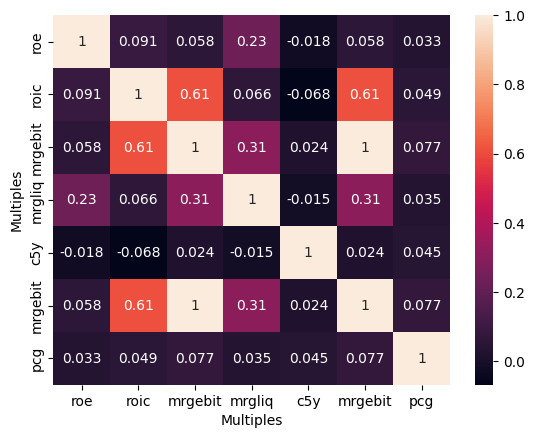

In [ ]:
matriz_correlacao = fundamentos.corr()
sns.heatmap(matriz_correlacao, annot=True)
matriz_correlacao

roe
papel        
ABEV3  0.1595
ALOS3  0.0548
ASAI3  0.1647
AURE3 -0.0552
AZZA3  0.0953
...       ...
VBBR3  0.2699
VIVA3  0.2435
VIVT3  0.0857
WEGE3  0.2886
YDUQ3  0.0982

[73 rows x 1 columns]

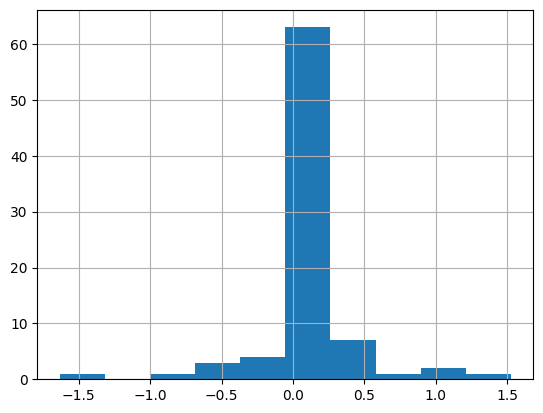

In [ ]:
roe = fundamentos['roe']
roe.hist()
roe = roe [(roe > roe.mean() - roe.std()) & ( roe < roe.mean() + roe.std()) ]
roe.to_frame()

#73 ativos

roic
papel        
ABEV3  0.1945
ALOS3  0.0595
ASAI3  0.1910
AURE3  0.0365
AZZA3  0.0713
...       ...
VAMO3  0.1543
VBBR3  0.0802
VIVA3  0.1799
VIVT3  0.0798
YDUQ3  0.0998

[63 rows x 1 columns]

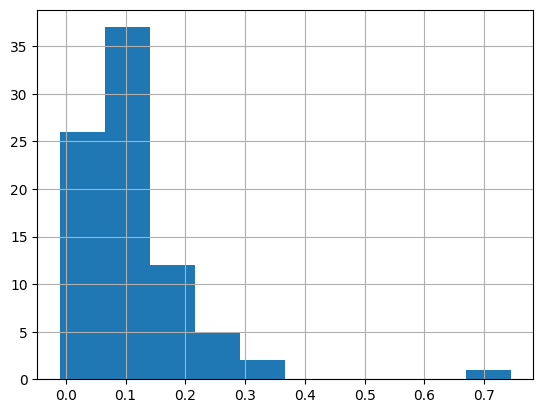

In [ ]:
roic = fundamentos['roic']
roic.hist()
roic = roic [(roic > roic.mean() - roic.std()) & ( roic < roic.mean() + roic.std()) ]
roic.to_frame()
#63 ativos

In [ ]:
fundamentos['roic']['ABEV3']

np.float64(0.1945)

In [ ]:
so_em_roe = roe.index.difference(roic.index)
so_em_roic = roic.index.difference(roe.index)
ambos =roe.index.intersection(roic.index)
print("Em ambos:", (ambos))
print("Somente em roe:", so_em_roe)
print("Somente em roic:", so_em_roic)

Em ambos: Index(['ABEV3', 'ALOS3', 'ASAI3', 'AURE3', 'AZZA3', 'B3SA3', 'BRAV3', 'CMIG4',
       'COGN3', 'CPFE3', 'CPLE6', 'CSNA3', 'CVCB3', 'CYRE3', 'DIRR3', 'EGIE3',
       'ELET3', 'ELET6', 'EMBR3', 'ENEV3', 'ENGI11', 'EQTL3', 'FLRY3', 'GGBR4',
       'GOAU4', 'HAPV3', 'HYPE3', 'IGTI11', 'ISAE4', 'KLBN11', 'MGLU3',
       'MULT3', 'PETR3', 'PETR4', 'PETZ3', 'POMO4', 'PRIO3', 'RADL3', 'RAIL3',
       'RDOR3', 'RECV3', 'RENT3', 'SLCE3', 'SMFT3', 'SMTO3', 'SUZB3', 'TAEE11',
       'TIMS3', 'UGPA3', 'USIM5', 'VALE3', 'VAMO3', 'VBBR3', 'VIVA3', 'VIVT3',
       'YDUQ3'],
      dtype='object', name='papel')
Somente em roe: Index(['BBAS3', 'BBDC3', 'BBDC4', 'BPAC11', 'BRAP4', 'BRFS3', 'CMIN3', 'CXSE3',
       'IRBR3', 'ITSA4', 'ITUB4', 'LREN3', 'PSSA3', 'SANB11', 'SBSP3', 'TOTS3',
       'WEGE3'],
      dtype='object', name='papel')
Somente em roic: Index(['BEEF3', 'CSAN3', 'MRFG3', 'MRVE3', 'NTCO3', 'PCAR3', 'RAIZ4'], dtype='object', name='papel')


In [ ]:
fundamentos[fundamentos['roe']>.3]
fundamentos[fundamentos['mrgebit']>.3]
fundamentos[fundamentos['mrgliq']>.3]
fundamentos[fundamentos['divpatr']>.3]
fundamentos[fundamentos['c5y']>.3]

Multiples  cotacao     pl    pvp    psr      dy     pa    pcg   pebit   pacl  \
papel                                                                          
BBSE3        31.80   7.13   6.06  0.000  0.1337  2.975   0.00    6.42   0.00   
BRKM5         8.55  -1.17  -1.79  0.088  0.0000  0.075   1.29  -23.11  -0.11   
CXSE3        13.72   9.50   3.09  0.000  0.0857  2.854  64.58 -314.22  65.91   
DIRR3        14.43  10.88   3.41  1.980  0.0862  0.649   2.17    8.65  -1.95   
MRFG3        22.70   6.88   6.87  0.122  0.1318  0.141   2.01    3.13  -0.30   
PRIO3        38.05   3.22   1.30  2.379  0.0000  0.615  10.78    8.00  -1.69   
STBP3        14.18  15.05  15.29  3.691  0.1665  2.220  75.13    8.36  -3.38   

Multiples  evebit  evebitda  mrgebit  mrgliq    roic     roe  liqc  \
papel                                                                
BBSE3        0.00      0.00   0.0000  0.0000  0.0000  0.8497  0.00   
BRKM5     -146.04      9.44  -0.0038 -0.0838 -0.0045  1.5267  1.21   
CXSE3     -305.80   -305.92   0.0000  0.0000 -0.0098  0.3252  1.59   
DIRR3        8.63      7.97   0.2290  0.2111  0.0935  0.3132  2.93   
MRFG3       10.04      4.59   0.0391  0.0241  0.0669  0.9986  1.22   
PRIO3       12.28      6.33   0.2976  0.7388  0.0865  0.4045  1.54   
STBP3        9.80      8.24   0.4415  0.2453  0.3048  1.0158  1.18   

Multiples        liq2m       patrliq  divbpatr     c5y  
papel                                                   
BBSE3      210195000.0  1.049400e+10      0.00  0.0000  
BRKM5       35861000.0 -3.805000e+09    -12.24 -0.0569  
CXSE3       56947700.0  1.333070e+10      0.00  0.0000  
DIRR3       61711900.0  2.203630e+09      0.96  0.2197  
MRFG3      140187000.0  2.834440e+09     23.30  0.2002  
PRIO3      340171000.0  2.618090e+10      0.88  0.4865  
STBP3       52830400.0  8.015930e+08      3.35  0.2758

In [ ]:


# =========================
# 4. Aplicar filtros
# =========================
# Exemplo: só empresas com ROE > 0 e Lucro Líquido > 0
ativos_filtrados = fundamentos[(fundamentos['roe'] > 0) & (fundamentos['liq2m'] > 0)]

ativos_filtrados = [ticker + '.SA' for ticker in ativos_filtrados.index]
ativos_filtrados

# Correlações

Seão buscado ativos descorrelacionados de modo a aumentar a representatividade dos setores.

# Series temporais

Estudo de series temporais

1. Visualizar dados

2. Estudar comportamentos

3. testar hipotese

# Treino

<h2>Treino - Tamanho da janela:

Para o treinamento do modelo, usaremos uma frequência de dados mensais, considerando o menor ruído que apresenta. Além do mais o rebalanceamento será mensal. O tamanho da janela não pode ser grande a ponto incluir períodos que refiltam contexxtos já não aplicáveis, nem curto a ponto de trazer overfitting (lookback será de 2 a 5 anos) de modo

1. Prever retornos esperados

Modelos estatísticos: ARIMA, VAR (boas para séries temporais).

Modelos econométricos: CAPM, Fama-French, regressões.

Machine Learning: Random Forest, XGBoost, Redes Neurais, LSTM (captam não linearidades).

Exemplo: usar uma rede neural para prever o retorno semanal de PETR4 a partir de indicadores técnicos + macroeconômicos.

2. Prever risco (volatilidade) e correlação

Modelos de volatilidade: ARCH/GARCH, EWMA.

Estimativas robustas: shrinkage de Ledoit-Wolf (matriz de covariância mais estável).

ML: alguns papers já usam LSTM e Transformers para prever volatilidade.

# Backtest

Backtest com rebalanceamneto mensal, comparando com carteria sem rebalancemanto

Montar carteira de Marcowitz

# Completa

In [ ]:
!pip install fundamentus

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fundamentus

# NATU3 -> NTCO3 e MOTV3 não existe mais
ibov = ["ALOS3", "ABEV3", "ASAI3", "AURE3", "AZZA3", "B3SA3", "BBSE3", "BBDC3",
    "BBDC4", "BRAP4", "BBAS3", "BRKM5", "BRAV3", "BRFS3", "BPAC11", "CXSE3",
    "CMIG4", "COGN3", "CPLE6", "CSAN3", "CPFE3", "CMIN3", "CVCB3", "CYRE3",
    "DIRR3", "ELET3", "ELET6", "EMBR3", "ENGI11", "ENEV3", "EGIE3", "EQTL3",
    "FLRY3", "GGBR4", "GOAU4", "HAPV3", "HYPE3", "IGTI11", "IRBR3", "ISAE4",
    "ITSA4", "ITUB4", "KLBN11", "RENT3", "LREN3", "MGLU3", "POMO4", "MRFG3",
    "BEEF3",  "MRVE3", "MULT3", "NTCO3", "PCAR3", "PETR3", "PETR4",
    "RECV3", "PRIO3", "PETZ3", "PSSA3", "RADL3", "RAIZ4", "RDOR3", "RAIL3",
    "SBSP3", "SANB11", "STBP3", "SMTO3", "CSNA3", "SLCE3", "SMFT3", "SUZB3",
    "TAEE11", "VIVT3", "TIMS3", "TOTS3", "UGPA3", "USIM5", "VALE3", "VAMO3",
    "VBBR3", "VIVA3", "WEGE3", "YDUQ3"]

tickers = [ativo + '.SA' for ativo in ibov]
# ************ baixar os precços ************
dt_ini, dt_fim =  '2023-01-01','2024-08-01'
df_precos = pd.DataFrame()
df_precos = yf.download(tickers, dt_ini, dt_fim)['Close']

# ************ dados fundamentalisata ************
fundamentos_total = fundamentus.get_resultado()
# filtra apenas os que estaõ no indice bovesap
fundamentos_total = fundamentos_total.loc[fundamentos_total.index.intersection([t for t in ibov])]
# apenas os indicadores desejados
fundamentos = fundamentos_total[['roe', 'roic', 'mrgebit', 'mrgliq', 'c5y', 'mrgebit', 'pcg']]
